In [2]:
import math
import numpy as np
import pandas as pd
import quandl, math
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df =  quandl.get("FINRA/FNYX_GOOGL", authtoken="knso8NxM2d6x_JtssaqB")

forecast_col = 'ShortVolume'
df.fillna(-99999, inplace=True) #outlier in your dataset
#generally, you use regression to forcast
print(df.tail())
print()
forecast_out = int(math.ceil(0.01*len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)
df.dropna(inplace=True)
print(df.tail())
print(forecast_out)

x = np.array(df.drop(['label'], 1)) #Features
y = np.array(df['label']) #labels

x = preprocessing.scale(x)
y = np.array(df['label'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

clf = LinearRegression()
#clf = svm.SVR(kernel = 'poly')
clf.fit(x_train, y_train)
accuracy = clf.score(x_test, y_test)

print(accuracy)

            ShortVolume  ShortExemptVolume  TotalVolume
Date                                                   
2023-07-19     778753.0            29786.0    1326802.0
2023-07-20     693829.0            13363.0    1314326.0
2023-07-21    4624607.0            10988.0    5700386.0
2023-07-24     397961.0             7729.0    1387130.0
2023-07-25     510914.0            23079.0    2384889.0

            ShortVolume  ShortExemptVolume  TotalVolume      label
Date                                                              
2023-06-13     197376.0            11782.0    1098936.0   778753.0
2023-06-14     285143.0            16145.0    1160235.0   693829.0
2023-06-15     546704.0            18697.0    1456107.0  4624607.0
2023-06-16     214829.0            15235.0     836536.0   397961.0
2023-06-20     196090.0            11839.0     772958.0   510914.0
24
0.16568583979380624


C:\Users\hp\AppData\Local\Temp/ipykernel_19500/2208208430.py:22: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = np.array(df.drop(['label'], 1)) #Features


C:\Users\hp\AppData\Local\Temp/ipykernel_19500/3637084939.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = np.array(df.drop(['label'], 1))  # Features


Regression Model Accuracy: 0.21523103108073205


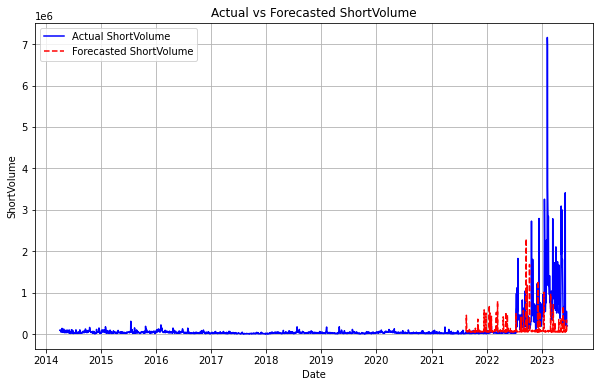


Dataset Tail:
            ShortVolume  ShortExemptVolume  TotalVolume      label
Date                                                              
2023-06-13     197376.0            11782.0    1098936.0   778753.0
2023-06-14     285143.0            16145.0    1160235.0   693829.0
2023-06-15     546704.0            18697.0    1456107.0  4624607.0
2023-06-16     214829.0            15235.0     836536.0   397961.0
2023-06-20     196090.0            11839.0     772958.0   510914.0

Forecast Period (forecast_out): 24


In [6]:
import numpy as np
import pandas as pd
import quandl
import math
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Fetching data using Quandl
df = quandl.get("FINRA/FNYX_GOOGL", authtoken="knso8NxM2d6x_JtssaqB")

forecast_col = 'ShortVolume'
df.fillna(-99999, inplace=True)  # Handling missing values (outliers) in the dataset

# Generate forecast
forecast_out = int(math.ceil(0.9 * len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)
df.dropna(inplace=True)

x = np.array(df.drop(['label'], 1))  # Features
y = np.array(df['label'])  # Labels

x = preprocessing.scale(x)
y = np.array(df['label'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

clf = LinearRegression()
clf.fit(x_train, y_train)
accuracy = clf.score(x_test, y_test)

print("Regression Model Accuracy:", accuracy)

# Visualization
plt.figure(figsize=(10, 6))

# Plotting actual ShortVolume data
plt.plot(df.index, df[forecast_col], color='blue', label='Actual ShortVolume')

# Plotting forecasted ShortVolume data with red dashed line
plt.plot(df.index[-len(x_test):], clf.predict(x_test), color='red', linestyle='dashed', label='Forecasted ShortVolume')

plt.title("Actual vs Forecasted ShortVolume")
plt.xlabel("Date")
plt.ylabel("ShortVolume")
plt.legend()
plt.grid(True)
plt.show()

# Printing the tail of the dataset
print("\nDataset Tail:")
print(df.tail())

# Printing forecast_out
print("\nForecast Period (forecast_out):", forecast_out)
